<a href="https://colab.research.google.com/github/santiagoahl/clustering-algorithms/blob/main/03_Hierachical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>[Hierachical clustering](#scrollTo=tScHA_yNXi02)

>>[Types of HC](#scrollTo=HsdJoywWYD69)

>[When is it useful?](#scrollTo=zlJTFRlbYo2R)

>>[Advantages](#scrollTo=zlJTFRlbYo2R)

>>[Disadvantages](#scrollTo=zlJTFRlbYo2R)

>[Implementation with scikit-learn](#scrollTo=gtDktp2ocWWq)

>>[Libraries](#scrollTo=RSon_auNdXOA)

>>[Data Preprocessing](#scrollTo=2rPMzAHzdZIS)

>>[Data-viz](#scrollTo=Oldca9NQeBzX)

>>>[Dendrogram](#scrollTo=0r3Mrl8Ge3g6)

>[Testing](#scrollTo=LTwbCGd2gyTd)



# Hierachical clustering

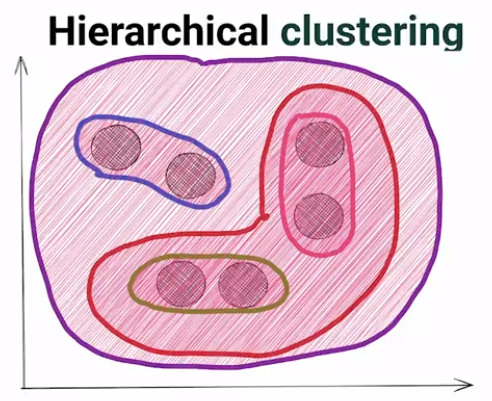


Levels are visualized with a dendrogram

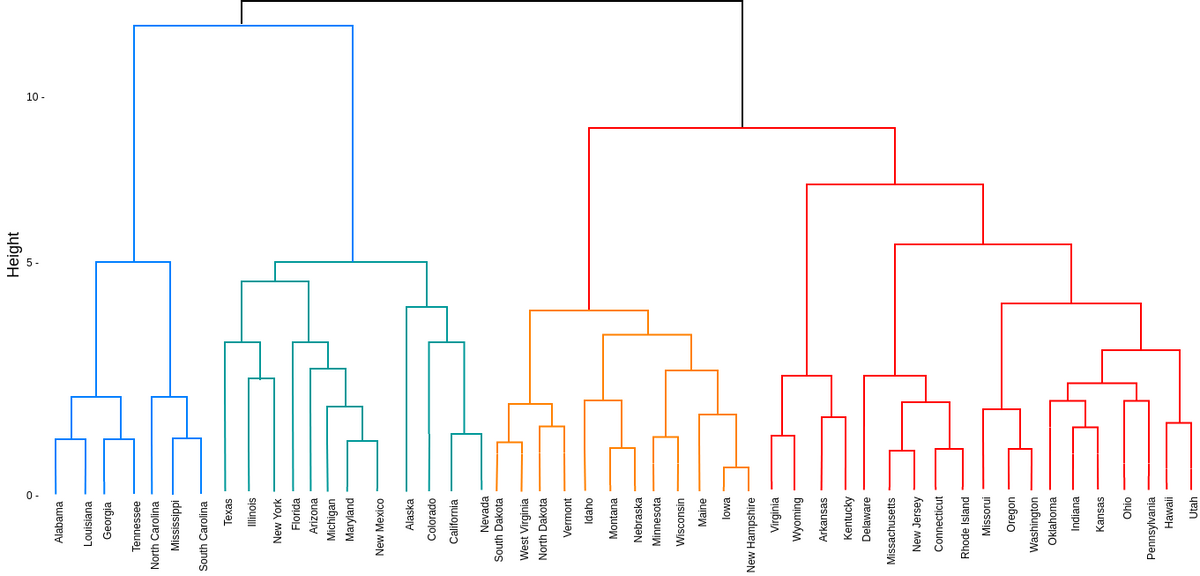

## Types of HC

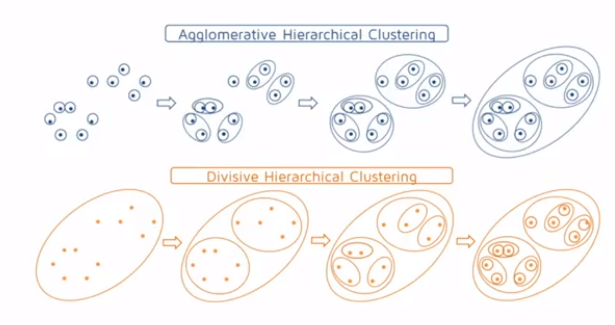

Aglomerative HC has in general best performance. It's based on **linkage**.

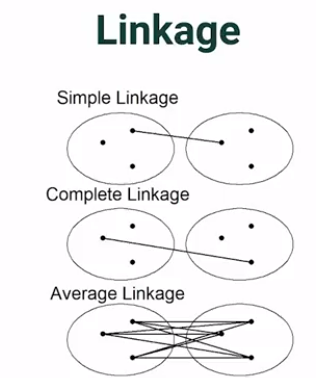

The best linkage method is **Ward**

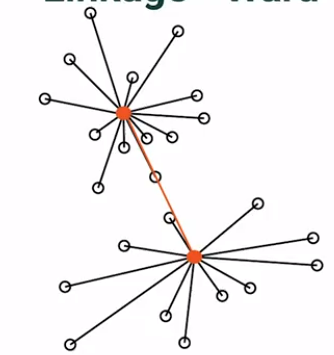

# When is it useful?

## Advantages
- Doesn't ask for number of clusters `k`.
- Interpretability.
- Needs just one execution
- Dendrograms helps a lot to visualize

## Disadvantages
- Bad performance on large datasets.
- There is no mathematical objective
- Outliers are a big problem
- Needs high computer resources

---

You should use this algorithm when:

- You want to understand the data visually
- Data isn't too large
- You have no idea about the number of clusters, I might to know though
- You need fast results

# Implementation with `scikit-learn`

## Libraries


In [ ]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples

from scipy.cluster.hierarchy import dendrogram, linkage

## Data Preprocessing

In [ ]:
X, y, c = make_blobs(500, n_features=2, centers=4, cluster_std=0.8, return_centers=True)

df_blobs = pd.DataFrame({
    'x1': X[:,0],
    'x2': X[:,1],
    'y': y
})

df_centers = pd.DataFrame({
    'x1': c[:,0],
    'x2': c[:,1]
})

## Data-viz

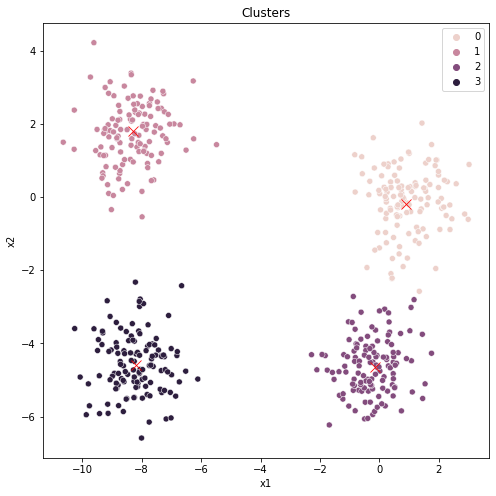

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='y')
sns.scatterplot(data=df_centers, x='x1', y='x2', marker='x', s=100, color='red')
plt.title('Clusters')
plt.show()

## Training

### Dendrogram 

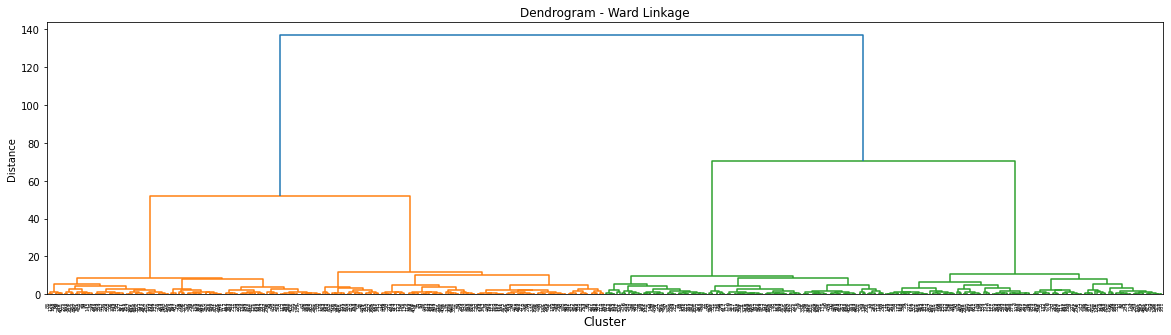

In [ ]:
plt.figure(figsize=(20, 5))
dendrogram_plot = dendrogram(linkage(X, method='ward'))
plt.title('Dendrogram - Ward Linkage')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Distance')
plt.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [ ]:
df_blobs['Cluster'] = y_hc

## Model's Clusterization

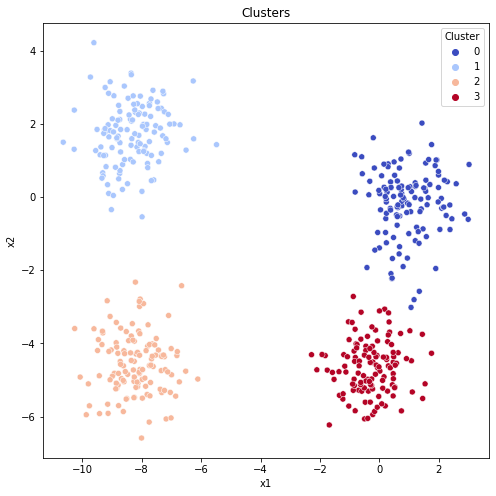

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='Cluster', palette='coolwarm')
plt.title('Clusters')
plt.show()

# Testing

In [ ]:
silhouette_score(X, y_hc)

0.7251145929087545

For n_clusters = 3 The average silhouette_score is : 0.7251145929087545
For n_clusters = 4 The average silhouette_score is : 0.7251145929087545
For n_clusters = 5 The average silhouette_score is : 0.7251145929087545
For n_clusters = 6 The average silhouette_score is : 0.7251145929087545


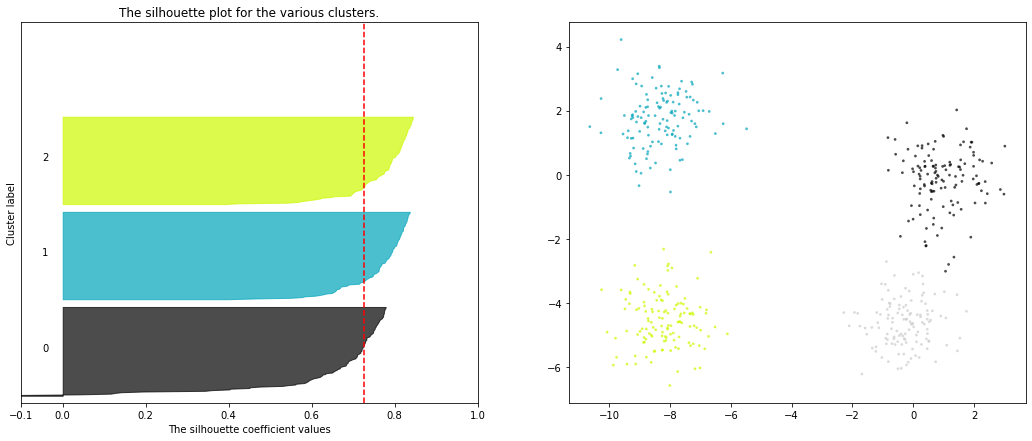

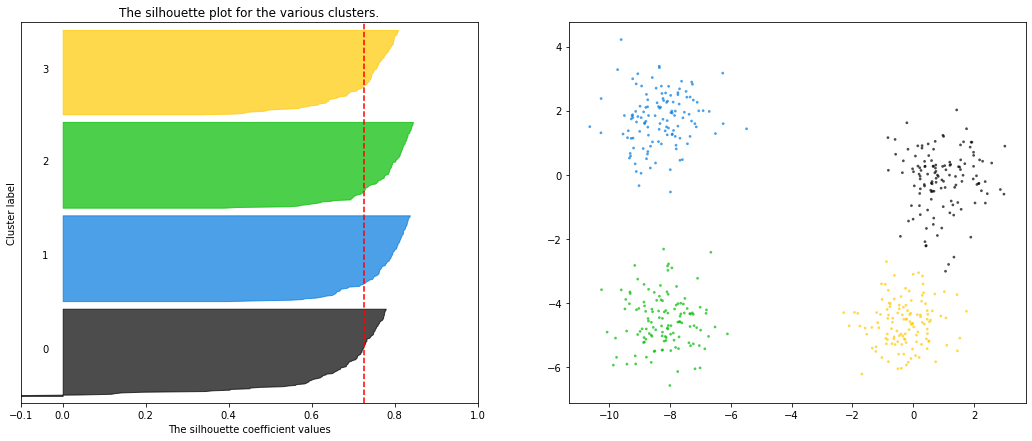

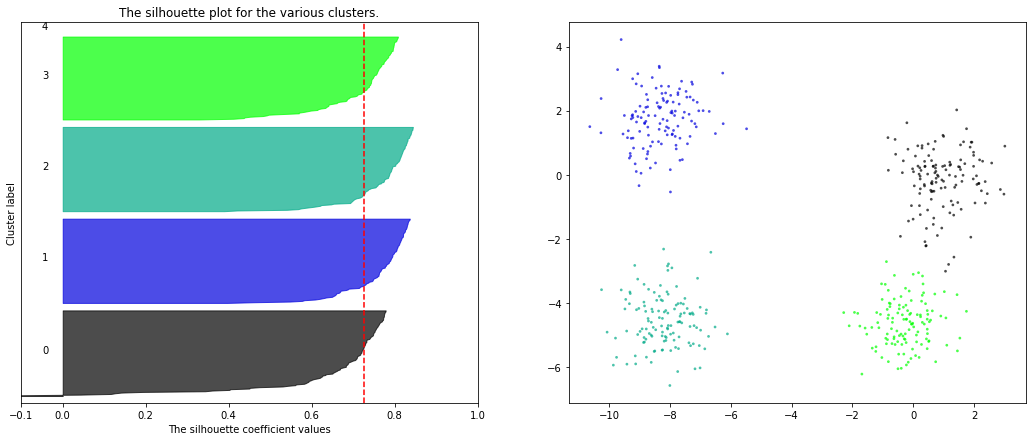

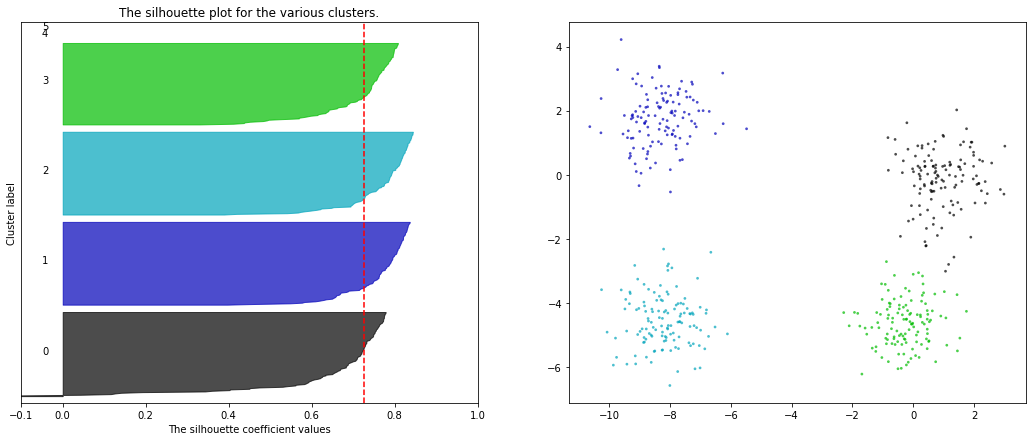

In [ ]:
range_n_clusters = [3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.

    clusterer = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

plt.show()